In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

plotly = False

In [2]:
data = pd.read_csv('APPL.csv',parse_dates=True, index_col=0)
series = data.Close
series.tail()

Date
2018-03-04    176.21
2018-03-11    179.98
2018-03-18    178.02
2018-03-25    164.94
2018-04-01    168.34
Name: Close, dtype: float64

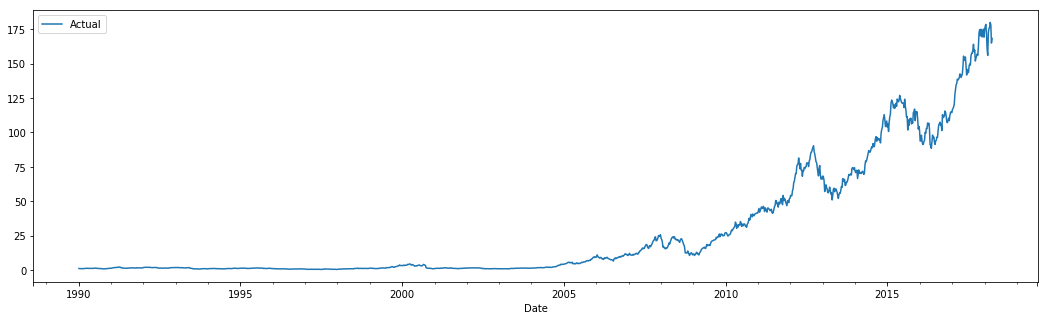

In [3]:
plt.figure(figsize=(18,5))
series.plot(label="Actual",legend=True)

In [4]:
import math
last = data.shape[0]-math.ceil(.2*(data.shape[0]))

### ACF and PACF
autocorrelation and partial autocorrelation

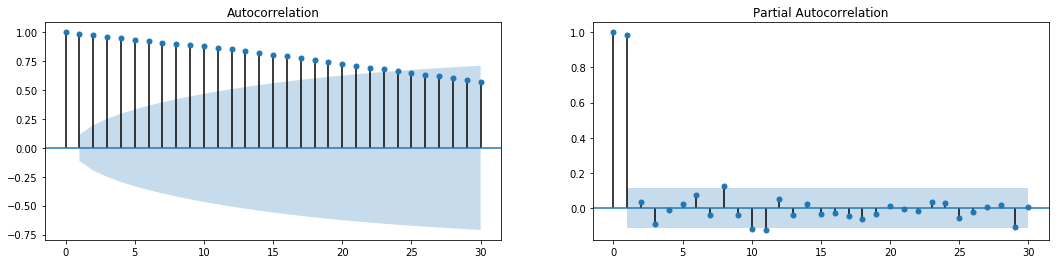

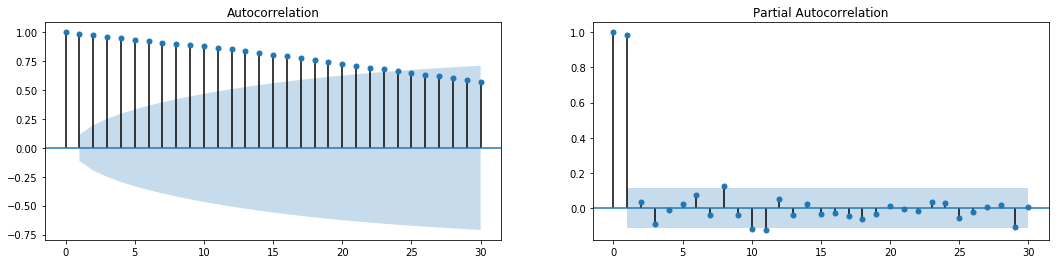

In [5]:
import statsmodels.tsa.api as smt
fig,ax = plt.subplots(figsize=(18,4),ncols=2,nrows=1)
smt.graphics.plot_acf(series[last:], lags=30,ax=ax[0], alpha=0.05)
smt.graphics.plot_pacf(series[last:], lags=30, ax=ax[1], alpha=0.05)

In [7]:
from statsmodels.tsa.arima_model import ARMA
for p in range(1,5):
    for q in range(1,5): 
        arma = ARMA(series[last:],order=(p,q),dates=series.index[last:],freq='W')
        arma_model = arma.fit()
        print("{} : {}".format((p,q),arma_model.aic))

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.